<a href="https://colab.research.google.com/github/Amruthasrao/CRM-CHATBOT/blob/main/CRM_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
%%writefile content.json
{"intents":
 [
  {
      "tag":"greeting",
   "input":["hello","hi there","hi","hi, is this opaque shop","hey there","hey"],
   "responses":[
                "Hi welcome to opaque shop!",
                "Hey how can i help you",
                "hello dear customer how can i help you",
                "hello how can i help you",
                "greetings customer how can i help you"
   ]
     },
  {
      "tag":"shop_details",
   "input":["Is this an electronics shop?","Does your shop sell electronics?"],
   "responses":[
                "Yes,our shop sells electronics",
                "Indeed our shop sells electronics",
                "Yes, this is an electronics shop",
                "Our shop does sell electronics"
   ]
     },
  {
      "tag":"shop_location",
   "input":["Where is your shop located?","Could you please tell me the location of your shop?","Which is your main branch?"],
   "responses":[
                "Vijayanagar",
                "Our shop is in Vijayanagar",
                "We are located in Vijayanagar",
                "We have a branch in Vijaynagar"
   ]
     },
     {
      "tag":"Television brand",
   "input":["Which brand of TV do you sell?","What type of TV do you sell?","Which TV do you sell?"],
   "responses":[
                "We sell Samsung LED, Sony, LG TVs",
                "We keep Samsung LED, Sony, LG TVs",
                "The shop offers Samsung LED, Sony, LG TVs",
                "We distribute Samsung LED, Sony, LG TVs"
                
   ]
     },
     {
      "tag":"branch",
   "input":["Is there any other branch of your shop?","Do have another opaque shop?","Do you have another branch located"],
   "responses":[
                "Yes, in Chennai",
                "Yes indeed, we have it in Chennai",
                "Our other branch is in Chennai",
                "We have another branch in Chennai"
   ]
     },
     {
      "tag":"price",
   "input":["What is the price of Samsung m30?","What is Samsung m30 priced at?","How much does Samsung m30 cost?","How much is Samsung m30?"],
   "responses":[
                "It costs rupees 32000",
                "It is priced at 32000",
                "It costs rupees 32000",
                "Samsung m30 costs 32000"
   ]
     },
     
  {
      "tag":"goodbye",
   "input":["Thank you, bye","thank you","bye bye","goodbye,thank you"],
   "responses":["Thank you customer","bye customer","Thank you customer,hope you have a nice day","goodbye customer"]
  }
 ]
 }

Writing content.json


In [3]:
with open('content.json') as content:
  data1 = json.load(content)

In [4]:
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [5]:
data = pd.DataFrame({'inputs':inputs,'tags':tags})
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,hi,greeting
3,"hi, is this opaque shop",greeting
4,hey there,greeting
5,hey,greeting
6,Is this an electronics shop?,shop_details
7,Does your shop sell electronics?,shop_details
8,Where is your shop located?,shop_location
9,Could you please tell me the location of your ...,shop_location


In [6]:
import string 
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
                                    

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer= Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [8]:
input_shape=x_train.shape[1]
input_shape

10

In [9]:
vocabulary = len(tokenizer.word_index)
print("Number of unique words:", vocabulary)
output_length = le.classes_.shape[0]
print("output length:", output_length)

Number of unique words: 46
output length: 7


In [10]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.9481 - accuracy: 0.1200
Epoch 2/200
1/1 [==============================] - 0s 21ms/step - loss: 1.9456 - accuracy: 0.1600
Epoch 3/200
1/1 [==============================] - 0s 19ms/step - loss: 1.9430 - accuracy: 0.1600
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 1.9406 - accuracy: 0.1600
Epoch 5/200
1/1 [==============================] - 0s 20ms/step - loss: 1.9381 - accuracy: 0.1600
Epoch 6/200
1/1 [==============================] - 0s 21ms/step - loss: 1.9356 - accuracy: 0.1600
Epoch 7/200
1/1 [==============================] - 0s 21ms/step - loss: 1.9332 - accuracy: 0.1600
Epoch 8/200
1/1 [==============================] - 0s 18ms/step - loss: 1.9307 - accuracy: 0.1600
Epoch 9/200
1/1 [==============================] - 0s 19ms/step - loss: 1.9282 - accuracy: 0.1600
Epoch 10/200
1/1 [==============================] - 0s 20ms/step - loss: 1.9256 - accuracy: 0.2800
Epoch 11/200
1/1 [===

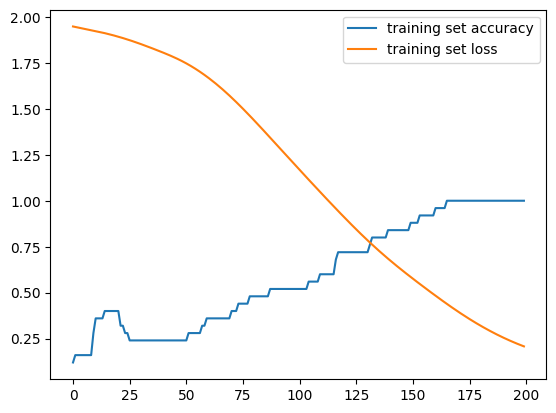

In [13]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [14]:
import random
while True:
  texts_p= []
  prediction_input= input('You: ')
  prediction_input= [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input= ''.join(prediction_input)
  texts_p.append(prediction_input)
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input= pad_sequences([prediction_input],input_shape)
  output = model.predict(prediction_input)
  output = output.argmax()
  response_tag = le.inverse_transform([output])[0]
  print("Salesman :",random.choice(responses[response_tag]))
  if response_tag == 'goodbye':
    break

KeyboardInterrupt: ignored